<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-каждого-параметра" data-toc-modified-id="Анализ-каждого-параметра-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ каждого параметра</a></span></li><li><span><a href="#Избавимся-от-редких-и-выбивающихся-значений" data-toc-modified-id="Избавимся-от-редких-и-выбивающихся-значений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Избавимся от редких и выбивающихся значений</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. А также картографические данные и расстояние до центра, аэропорта, ближайшего парка и водоёма. Необходимо проанализировать и подготовить данные для прогнозирования рыночной стоимости недвижимости.

## Изучение данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
for row in df: 
      print(df[row].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


**Вывод**


23699 строк. 22 колонки. bool(2), float64(14), int64(3), object(3)  
Колонки: 14 колонок содержат пропуски, надо будет изучить природу пропусков. Колонка cityCenters_nearest содержит заглавную букву, необходимо будет привести к нижнему регистру.  

bool(2), float64(14), int64(3), object(3)

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
- balcony — изменить тип на целочисленный  
- ceiling_height — смущают квартиры с потолком 100 метров и 1 метр, да и 27,5 выглядит подозрительно, изучим подробнее  

- cityCenters_nearest — необходимо будет привести к нижнему регистру  

- days_exposition — изменить тип на целочисленный  

- first_day_exposition — нужно перевести в формат daytime  

floor — этаж  
- floors_total — изменить тип на целочисленный  
- is_apartment — изменить на булев тип  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
- parks_around3000 — изменить тип на целочисленный  
parks_nearest — расстояние до ближайшего парка (м)  
- ponds_around3000  — изменить тип на целочисленный  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  




## Предобработка данных

Переименум столбцы, уберем заглавную букву:

In [7]:
df.columns = df.columns.str.lower()

Проверим количество пропусков

In [8]:
def null(data):
    return data.isnull().agg(['sum','mean']).transpose()
null(df)

,sum,mean
total_images,0.0,0.000000
last_price,0.0,0.000000
total_area,0.0,0.000000
first_day_exposition,0.0,0.000000
rooms,0.0,0.000000
ceiling_height,9195.0,0.387991
floors_total,86.0,0.003629
living_area,1903.0,0.080299
floor,0.0,0.000000
is_apartment,20924.0,0.882906


0.2% процента пропусков в названии населённого пункта, можно пренебречь  

одинаковое количество пропусков больше 20% в колонках о парках, прудах и центре города, необходимо изучить подробнее

13% объектов выствлено 0 дней, можно предположить, что так оно и есть, но необходимо проверить

У 49% объектов не информации о количестве балконов, логично предположить, что поле не заполнено, потому что балкона нет.

Для 10% - не указана площадь кухни, для 8% - жилая площадь, для 39% - высота потолков


Приведём к нижнему регистру названия населённых пунктов

In [9]:
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].str.lower()

Информацию о наличии балкона заполняет пользователь, если он заинтересован быстрее и дороже продать, он всегда заполнит это   поле если балкон есть.     
Возможные причины пропуска:  
случайно пропустил  
данные выгружены автоматически и в источнике не было этой информации, или произошла ошибка при переносе  
сотрудник агенства недвижимости поленился заполнить поле  
возможно и то, что я очень сильно отстал от реальности, и все на самом деле так печально, люди живут без балконов  
часто о наличии балкона можно судить зная адрес и тип объекта или по похожим объявлениям в том же доме.  
Это не является частью нашего исследования
Мы заполним пропуски нулями

In [10]:
df['balcony'] = df['balcony'].fillna(0)

Изменим тип данных в колонке is_apartment

In [11]:
df['is_apartment'] = df['is_apartment'].astype('bool')

Попробуем заполнить отсутствующие значения исходя из известных параметров, для этого определим, с чем больше всего коррелирует размер кухни  иразмер жилой площади

In [12]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.039860,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.000640,-0.025362,-0.008802,0.519869,0.008559,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.007836,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.005338,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,-0.030715,0.001674,0.042777,0.087641,0.031216,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.003472,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.009535,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.006182,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.039860,0.000640,-0.007836,-0.005338,-0.030715,-0.003472,-0.009535,-0.006182,1.000000,0.003569,0.001754,-0.011218,-0.155306,0.007712,-0.000720,-0.001200,-0.018743,-0.009599,0.019909,-0.063304
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,0.003569,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


Как видим, есть зависимость от площади квартиры в целом, от количества комнат и жилой площади зависимость существенно ниже и видимо опосредована общей площадью.
Разобъем данные об общей площади на группы и исходя из средних показателей заполним площадь кухни

In [13]:
df['total_cut'] = pd.qcut(df['total_area'], 20)

Хочу проверить, есть студии или квартиры с указанным 0 комнат с данными по кухне

In [14]:
df[df.loc[:,'studio'] == True][df.loc[:,'kitchen_area'] > 0]

/tmp/ipykernel_76/1173992712.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.loc[:,'studio'] == True][df.loc[:,'kitchen_area'] > 0]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_cut


In [15]:
df[df.loc[:,'rooms'] == 0][df.loc[:,'kitchen_area'] > 0]

/tmp/ipykernel_76/197183004.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.loc[:,'rooms'] == 0][df.loc[:,'kitchen_area'] > 0]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_cut


У  всех студий и всех квартир с 0 комнат нет данных о размере кухни. Предполагаю, что для анализа лучше в эти строки внести размер кухни равны 0. В пользу этого также говорит то, что у таких квартир очень маленькая площадь за редким исключением.

In [16]:
df['kitchen_area'] = df.groupby('total_cut')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

In [17]:
df.loc[(df['rooms'] == 0) | (df['studio'] == True), 'kitchen_area'] = 0

C той же логикой можно заполнить пропуски в данных о жилой площади, корреляция там еще выше.

In [18]:
df['living_area'] = df.groupby('total_cut')['living_area'].apply(lambda x: x.fillna(x.median()))

Нет явной взаимосвязи высоты потолков с другими параметрами, оставим не заполнеными поля  

Также мы не сможем самостоятельно заполнить пропущеные значения в данных о парках, прудах, аэропорте и центре.  
Я полагаю, что эти данные заполняются автоматически алгоритмами Яндекс.Недвижимость при вводе адреса объекта.  
Если данных нет, на это есть причина.  

Также нет явного параметра позволяющего нам заполнить дни выставления квартиры на рынке, оставим как есть.

Изменим формат даты

In [19]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

Нет какой либо заметной корреляции is_apartment с другими данными в таблице.  
Насколько я знаю аппартаментов очень мало по отношению к жилой недвижимости, при этом будет неверно заменить все значения на 0, аппартаментов точно больше 50 ти.  
Оставим столбец незаполненным и не будем использовать в анализе.

Удалим строки с отсутствующими названием локации и количеством этажей. Таких строк очень мало, это не повлияет на результат анализа

In [20]:
df.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Проверим еще раз пропуски

In [21]:
null(df)

,sum,mean
total_images,0.0,0.000000
last_price,0.0,0.000000
total_area,0.0,0.000000
first_day_exposition,0.0,0.000000
rooms,0.0,0.000000
ceiling_height,9084.0,0.385487
floors_total,0.0,0.000000
living_area,0.0,0.000000
floor,0.0,0.000000
is_apartment,0.0,0.000000


Все необходимые пропуски обработали.  
Проверим таблицу на дубликаты и типы данных

In [22]:
df.duplicated(keep = False).sum()

0

Изменим типы данных в ячейках и заодно проверим, как это отобразится на потреблении памяти:

In [23]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [24]:
mem_usage(df)

'6.63 MB'

In [25]:
df['floor'] = df['floor'].astype('category')
df['floors_total'] = df['floors_total'].astype('category')
df['balcony'] = df['balcony'].astype('category')
df['parks_around3000'] = df['parks_around3000'].astype('category')
df['ponds_around3000 '] = df['ponds_around3000'].astype('category')

In [26]:
mem_usage(df)

'6.03 MB'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  category      
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  category      
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод**

Отсутствующую в 49% строк информацию о балконах заполнили нулями.     
Также мы сгруппировали квартиры по общей площади и заполнили медианными значения по каждой группе отстуттвующие данные общей площади и площади кухни, т.е. около 10% строк.
Другие пропущенные данные не стали заполнять, т.к. нет достоверного способа.
Убрали заглавные буквы из названий колонок.
Убедились, что нет дупликатов.



## Рассчёты и добавление результатов в таблицу

 Посчитаем цену квадратного метра

In [28]:
df['price'] = df['last_price'] / df['total_area']

Добавим столбец информацией о том какой этаж: первый, последний, другой:

In [29]:
def first_floor(row):
    floor = row['floor']
    last = row['floors_total']
    if floor == 1: return 'first'
    elif floor == last: return 'last'
    return 'another' 
    
df['floor1last'] = df.apply(first_floor, axis = 1)    

Посчитаем соотношение жилой и общей площади:

In [30]:
df['living_total'] = df['living_area'] / df['total_area']

Посчитаем соотношение общей площади и кухни:

In [31]:
df['kitchen_total'] = df['kitchen_area'] / df['total_area']

Выведем в отдельные столбцы день недели, месяц и год публикации объявления
        

In [32]:
df['year_exp'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['month_exp'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['weekday_exp'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,NaN,"(93.52, 116.0]",2.0,120370.370370,another,0.472222,0.231481,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,81.0,"(40.0, 42.0]",0.0,82920.792079,first,0.460396,0.272277,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,558.0,"(55.0, 58.0]",2.0,92785.714286,another,0.612500,0.148214,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,88.0,9,True,...,424.0,"(116.0, 900.0]",3.0,408176.100629,another,0.553459,0.119182,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,121.0,"(93.52, 116.0]",1.0,100000.000000,another,0.320000,0.410000,2018,6,1


Мы посчитали и добавили в таблицу  столбцы отражающие следущие параметры:
- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры; варианты — первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

## Исследовательский анализ данных

### Анализ каждого параметра

Изучим следующие параметры: площадь, цена, число комнат, высота потолков, 
 построим гистограммы для каждого параметра

In [51]:
df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'price', 'rooms', 'ceiling_height']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_area,23565.0,6.032282e+01,3.565706e+01,12.000000,4.000000e+01,52.00,6.970000e+01,900.0
living_area,23565.0,3.452625e+01,2.178329e+01,2.000000,1.860000e+01,30.00,4.240000e+01,409.7
kitchen_area,23565.0,1.037164e+01,5.780191e+00,0.000000,7.000000e+00,9.00,1.190000e+01,112.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.000000,3.400000e+06,4646000.00,6.790000e+06,763000000.0
price,23565.0,9.940584e+04,5.038943e+04,111.834862,7.656613e+04,95000.00,1.142132e+05,1907500.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.000000,1.000000e+00,2.00,3.000000e+00,19.0
ceiling_height,14481.0,2.771283e+00,1.261983e+00,1.000000,2.510000e+00,2.65,2.800000e+00,100.0


Предварительно:
Средний медианный размер квартир 52 метра, что соответствует здравому смыслу. Жилая площадь 30 метров, площадь кухни 9 метров   
Средняя медианная цена квартиры 4,6 млн.р., 95 т.р. за квадратный метр.  
В среднем 2 комнаты  
Высота потолков 2,5 метра  
Большая разница между медианными и средними арифметическими показателями говорит о том, что не мало объектов сильно выбиваются из общего ряда, очень большие, высокие, дорогие.  


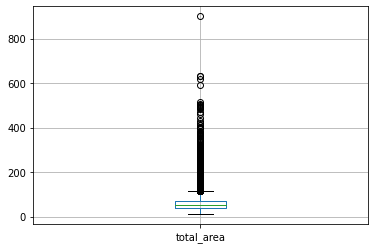

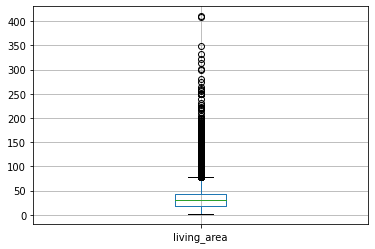

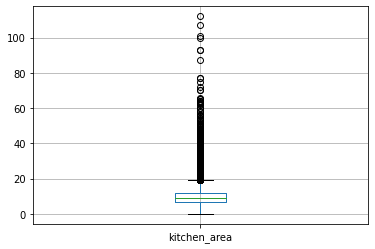

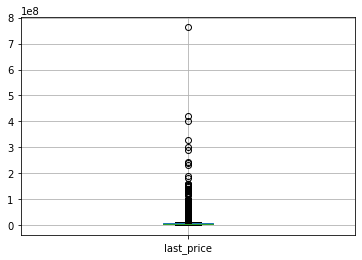

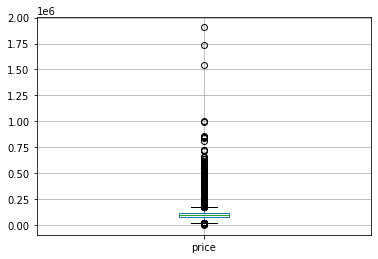

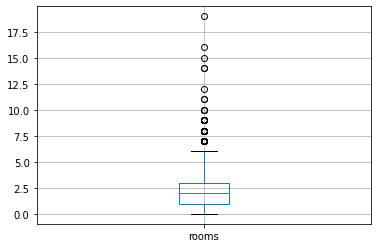

<AxesSubplot:>

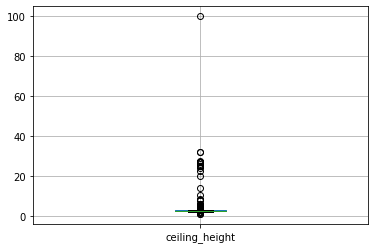

In [52]:
df.boxplot(column='total_area')
plt.show()
df.boxplot(column='living_area')
plt.show()
df.boxplot(column='kitchen_area')
plt.show()
df.boxplot(column='last_price')
plt.show()
df.boxplot(column='price')
plt.show()
df.boxplot(column='rooms')
plt.show()
df.boxplot(column='ceiling_height')


Из ящиков с усами мы можем определить границы, за которыми лежат выбросы для лучшего построения гистограмм


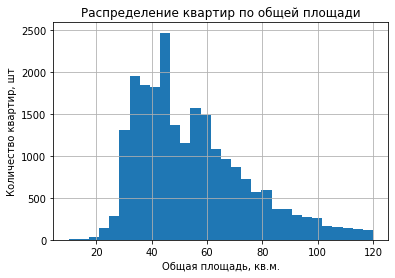

In [35]:
ax = df['total_area'].hist(bins = 30, range = (10, 120))
ax.set_title("Распределение квартир по общей площади")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Общая площадь, кв.м.");

Больше всего квартир размером от 30 до 82 кв.м. с явным пиком 42-44 кв.м.

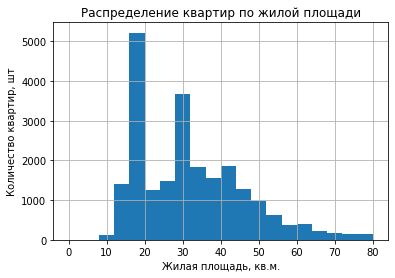

In [36]:
ax = df['living_area'].hist(bins = 20,  range = (0, 80))
ax.set_title("Распределение квартир по жилой площади")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Жилая площадь, кв.м.");

Жилая площадь в среднем от 12 до 52 кв.м. с главным пиком в 19 кв.м. и меньшим пиком 30 кв.м.

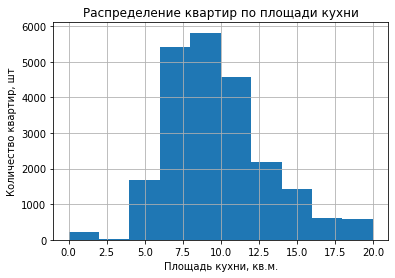

In [37]:
ax = df['kitchen_area'].hist(bins = 10, range = (0, 20))
ax.set_title("Распределение квартир по площади кухни")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Площадь кухни, кв.м.");

Кухни в основном  от 4 до 16 кв.м. с пиком 9 кв.м.

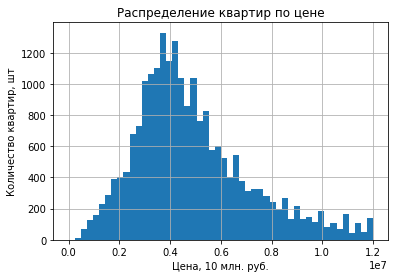

In [38]:
ax = df['last_price'].hist(bins = 50, range = (0, 12000000))
ax.set_title("Распределение квартир по цене")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Цена, 10 млн. руб.");

Цена квартир в среднем от 2,5 до 9 млн. руб. Большая часть квартир продается по цене от 3 до 5,5 млн. руб.

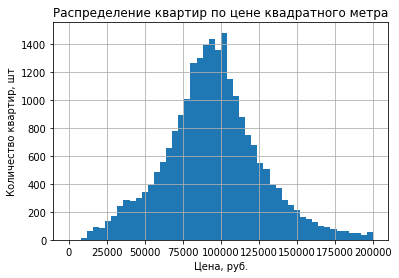

In [39]:
ax = df['price'].hist(bins = 50, range = (0, 200000))
ax.set_title("Распределение квартир по цене квадратного метра")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Цена, руб.");

Цена квадратного метра в среднем от 60 000 руб. до 130 000 руб., пик от 80 000 до 110 000 руб.

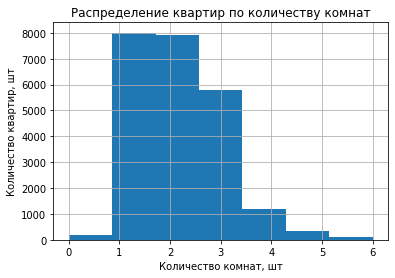

In [40]:
ax = df['rooms'].hist(bins = 7, range = (0, 6))
ax.set_title("Распределение квартир по количеству комнат")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Количество комнат, шт");

Логично видеть, что наиболее популярны 1 и 2 комнатные квартиры, потом идут 3 комнатные, квартиры с большим количсетвом комнат продаются существенно реже

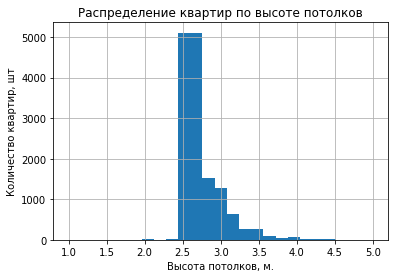

In [41]:
ax = df['ceiling_height'].hist(bins = 25, range = (1, 5))
ax.set_title("Распределение квартир по высоте потолков")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Высота потолков, м.");

Высота потолков в большинстве квартир 2,5 метра, Потолки выше 3 х метров встречаются уже очень редко, что логично для жилого помещения

Изучим время продажи квартиры:

In [42]:
df['days_exposition'].describe().transpose()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

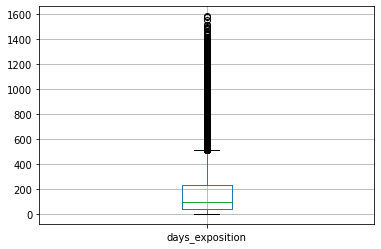

In [43]:
df.boxplot(column='days_exposition')

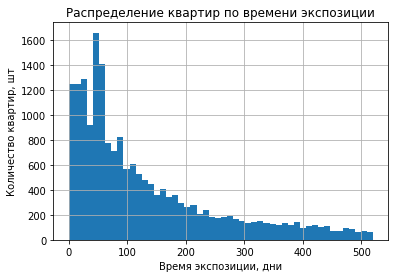

In [44]:
ax = df['days_exposition'].hist(bins = 50, range = (0, 520))
ax.set_title("Распределение квартир по времени экспозиции")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Время экспозиции, дни");

среднее время продажи - 180 дней, при этом медианное 95 дней
Такую большую разницу можно объяснить выбросами, часть объявлений висела и не закрывалась по каким либо причинам:  
хозяин квартиры мог мониторить рынок без желания продать  
риэлтор создал фэйковое объявление, чтобы увеличить среднюю цену объектов в районе и не убирает его  
объявление забыли снять после продажи объекта  
продается очень специфичная квартира  
любой из этих вариантов мешает нам изучить этот параметр.  
есть понимание, что множество объявлений не соответствуют реальной цели продать квартиру   
исходя из целей нашего исследования следует сделать такой срез, чтобы медианное время продажи приблизилось к среднему


In [45]:
fg = df.query('days_exposition < 180')
fg['days_exposition'].describe().transpose()

count    13937.000000
mean        67.378632
std         47.093573
min          1.000000
25%         29.000000
50%         59.000000
75%         99.000000
max        179.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

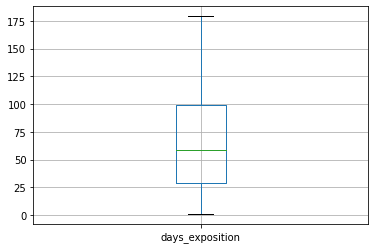

In [46]:
fg.boxplot(column='days_exposition')

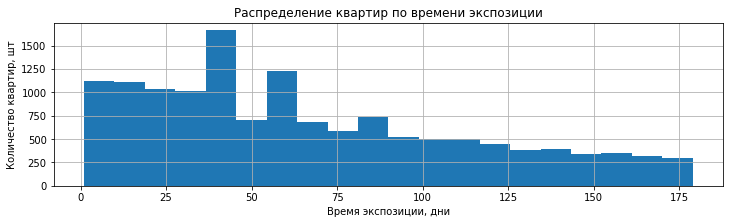

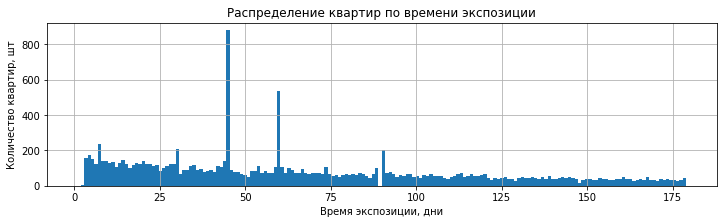

In [47]:
ax = fg['days_exposition'].hist(bins = 20, figsize=(12,3))
ax.set_title("Распределение квартир по времени экспозиции")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Время экспозиции, дни");
plt.show()
ax = fg['days_exposition'].hist(bins = 180, figsize=(12,3))
ax.set_title("Распределение квартир по времени экспозиции")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Время экспозиции, дни");

После изменений получаем следующие данные:

В среднем квартиры продаются за 45 - 60 дней, если сделка совершена за срок меньше 30 дней, можно сказать,что продажа прошла быстро, больше 180 дней - необычайно долго

Смущает то, что есть пики с промежутком в 15 дней. Сделки купли продажи заключаются более менее равномерно в течении недели/месяца. Значит это связано с особенностью закрытий объявлений в яндекс недвижимости.
Могу предположить, что заканчивается срок оплаты, или с этой регулярность приходит опрос об актуальности объяления.
Необходимо уточнить у разработчиков.
Гистограмму стоит оценивать по другому, срок продажи меньше чем срок существования объявления.

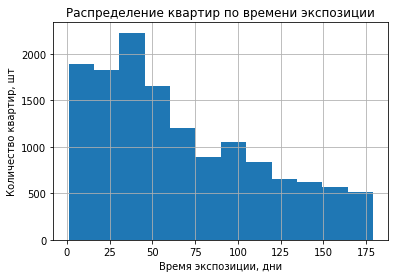

In [48]:
ax = fg['days_exposition'].hist(bins = 12)
ax.set_title("Распределение квартир по времени экспозиции")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Время экспозиции, дни");

Отсюда видно, что нормальный срок продажи до 45 дней.

### Избавимся от редких и выбивающихся значений

In [49]:
df.query('last_price > 150000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,...,NaN,"(116.0, 900.0]",1.0,5.000000e+05,last,0.612903,0.203226,2018,10,4
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,True,...,233.0,"(116.0, 900.0]",3.0,1.736842e+06,another,0.500000,0.210526,2018,4,2
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9.0,131.0,7,True,...,501.0,"(116.0, 900.0]",1.0,6.600000e+05,another,0.540429,0.082508,2015,8,3
5893,3,230000000.0,500.0,2017-05-31,6,NaN,7.0,88.0,7,True,...,50.0,"(116.0, 900.0]",2.0,4.600000e+05,last,0.176000,0.080000,2017,5,2
8900,13,190870000.0,268.0,2016-03-25,3,NaN,8.0,132.0,7,True,...,901.0,"(116.0, 900.0]",2.0,7.122015e+05,another,0.492537,0.149254,2016,3,4
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,True,...,33.0,"(116.0, 900.0]",3.0,1.907500e+06,last,0.625000,0.047375,2017,9,5
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,True,...,199.0,"(116.0, 900.0]",2.0,5.853659e+05,last,0.531707,0.097561,2017,4,5
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,393.0,"(116.0, 900.0]",1.0,1.000748e+06,last,0.508728,0.059850,2016,2,5
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,True,...,111.0,"(116.0, 900.0]",2.0,4.854369e+05,another,0.417476,0.113269,2017,12,0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,True,...,249.0,"(116.0, 900.0]",3.0,8.575429e+05,another,0.639832,0.104305,2017,4,0


Всего 15 строк, а их значения могу сильно изменить показатели

In [50]:
df.query('last_price > 40000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,88.0,9,True,...,424.0,"(116.0, 900.0]",3.0,4.081761e+05,another,0.553459,0.119182,2015,7,4
51,7,45000000.0,161.0,2017-10-17,3,3.20,8.0,38.0,4,True,...,541.0,"(116.0, 900.0]",3.0,2.795031e+05,another,0.236025,0.310559,2017,10,1
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,True,...,62.0,"(116.0, 900.0]",3.0,3.028391e+05,last,0.577287,0.059779,2017,7,4
411,1,40662000.0,151.0,2014-12-09,3,NaN,8.0,85.0,3,True,...,594.0,"(116.0, 900.0]",3.0,2.692848e+05,another,0.562914,0.152318,2014,12,1
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,...,578.0,"(116.0, 900.0]",1.0,2.374991e+05,another,0.569033,0.075276,2015,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20,59000000.0,127.5,2016-12-21,4,3.00,12.0,85.0,8,True,...,635.0,"(116.0, 900.0]",3.0,4.627451e+05,another,0.666667,0.101961,2016,12,2
22804,4,81960000.0,205.0,2017-09-29,4,3.20,9.0,108.0,3,True,...,169.0,"(116.0, 900.0]",1.0,3.998049e+05,another,0.526829,0.048780,2017,9,4
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,True,...,NaN,"(116.0, 900.0]",3.0,1.542605e+06,last,0.339733,0.161067,2019,3,1
22907,9,65000000.0,228.0,2016-06-02,4,NaN,5.0,200.0,2,True,...,NaN,"(116.0, 900.0]",3.0,2.850877e+05,another,0.877193,0.083114,2016,6,3


In [51]:
df.query('price > 400000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,88.0,9,True,...,424.0,"(116.0, 900.0]",3.0,4.081761e+05,another,0.553459,0.119182,2015,7,4
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,True,...,14.0,"(116.0, 900.0]",3.0,4.398148e+05,another,0.398148,0.356481,2017,12,1
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,True,...,342.0,"(116.0, 900.0]",3.0,4.354839e+05,another,0.806452,0.161290,2018,5,1
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,...,NaN,"(116.0, 900.0]",1.0,5.000000e+05,last,0.612903,0.203226,2018,10,4
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6.0,188.7,3,True,...,316.0,"(116.0, 900.0]",0.0,4.060564e+05,another,0.649346,0.075705,2018,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,16,148000000.0,256.0,2016-03-16,5,NaN,6.0,179.0,5,True,...,233.0,"(116.0, 900.0]",3.0,5.781250e+05,another,0.699219,0.140625,2016,3,2
22709,20,59000000.0,127.5,2016-12-21,4,3.00,12.0,85.0,8,True,...,635.0,"(116.0, 900.0]",3.0,4.627451e+05,another,0.666667,0.101961,2016,12,2
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,True,...,NaN,"(116.0, 900.0]",3.0,1.542605e+06,last,0.339733,0.161067,2019,3,1
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,...,19.0,"(11.999, 31.0]",3.0,6.000000e+05,last,0.560000,0.440000,2018,7,2


In [52]:
df.query('kitchen_area > 70')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp
492,18,95000000.0,216.0,2017-12-05,4,3.0,5.0,86.0,4,True,...,14.0,"(116.0, 900.0]",3.0,439814.814815,another,0.398148,0.356481,2017,12,1
2489,9,12500000.0,255.0,2017-04-21,3,NaN,2.0,153.9,2,True,...,102.0,"(116.0, 900.0]",3.0,49019.607843,last,0.603529,0.394902,2017,4,4
4394,20,57000000.0,174.0,2015-11-09,3,3.2,10.0,95.0,6,True,...,1039.0,"(116.0, 900.0]",3.0,327586.206897,another,0.545977,0.442529,2015,11,0
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,True,...,14.0,"(116.0, 900.0]",0.0,110169.491525,another,0.693220,0.169492,2019,2,3
10867,1,56844500.0,177.9,2015-01-15,3,NaN,6.0,87.2,5,True,...,NaN,"(116.0, 900.0]",3.0,319530.635188,another,0.490163,0.490163,2015,1,3
14644,17,47000000.0,150.0,2017-02-28,4,3.7,6.0,58.0,5,True,...,507.0,"(116.0, 900.0]",0.0,313333.333333,another,0.386667,0.500000,2017,2,1
16239,5,82400000.0,181.1,2017-05-24,3,3.9,9.0,58.2,4,False,...,501.0,"(116.0, 900.0]",0.0,454997.239094,another,0.321369,0.514633,2017,5,2
16647,15,122000000.0,145.0,2017-04-25,3,3.3,6.0,36.0,2,True,...,335.0,"(116.0, 900.0]",3.0,841379.310345,another,0.248276,0.496552,2017,4,1
16797,9,65850000.0,146.0,2017-07-14,2,NaN,9.0,40.0,3,True,...,77.0,"(116.0, 900.0]",0.0,451027.397260,another,0.273973,0.636986,2017,7,4
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,True,...,106.0,"(116.0, 900.0]",2.0,466666.666667,last,0.455222,0.124444,2017,12,2


In [53]:
df.query('rooms > 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,True,...,NaN,"(116.0, 900.0]",0.0,95264.017420,last,0.755580,0.072401,2018,7,6
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,...,418.0,"(116.0, 900.0]",2.0,68870.523416,another,0.611570,0.045730,2017,12,5
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,True,...,NaN,"(116.0, 900.0]",1.0,84372.707263,last,0.535216,0.068966,2018,1,3
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,True,...,14.0,"(116.0, 900.0]",0.0,110169.491525,another,0.693220,0.169492,2019,2,3
8822,14,49968900.0,398.0,2017-07-12,9,3.00,2.0,160.1,1,False,...,471.0,"(116.0, 900.0]",2.0,125550.000000,first,0.402261,0.103015,2017,7,2
8860,12,17000000.0,235.0,2018-07-14,9,3.00,6.0,88.0,3,True,...,90.0,"(116.0, 900.0]",0.0,72340.425532,another,0.374468,0.080638,2018,7,5
9550,10,23500000.0,313.0,2017-02-13,9,3.20,6.0,179.2,5,True,...,NaN,"(116.0, 900.0]",0.0,75079.872204,another,0.572524,0.042173,2017,2,0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,True,...,813.0,"(116.0, 900.0]",2.0,170015.455951,another,0.664606,0.061309,2017,2,1
13019,0,22250000.0,249.9,2019-04-23,9,3.20,5.0,157.0,5,True,...,NaN,"(116.0, 900.0]",0.0,89035.614246,last,0.628251,0.049620,2019,4,1
13397,14,19500000.0,309.7,2016-02-03,9,NaN,5.0,199.0,5,True,...,468.0,"(116.0, 900.0]",0.0,62964.158863,last,0.642557,0.046174,2016,2,2


Можно заметить, что самые большие по площади и самые дорогие объекты в большинстве своем апартаменты.
Небольшое количество сверх дорогих и больших объктов может существенно повлиять на результаты анализа рынка недвижимости.

In [54]:
fg = df.query(
    '(last_price < 40000000) and (price < 400000) and (kitchen_area < 70) and (rooms < 9)'
    ).reset_index(drop=True)
fg_kitchen = fg.query(
    'kitchen_area > 0'
    ).reset_index(drop=True)

In [55]:
Izbavilis = (len(df) - len(fg)) / len(df)
Izbavilis

0.009378315298111606

Изучим факторы влияющие на стоимость квартиры:

Исследуем зависимость цены квартиры от общей площади:

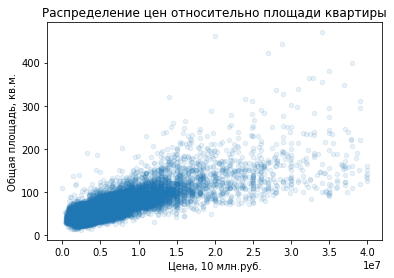

In [56]:
ax = fg.plot(x='last_price', y='total_area', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно площади квартиры")
ax.set_ylabel("Общая площадь, кв.м.")
ax.set_xlabel("Цена, 10 млн.руб.");

In [57]:
fg['last_price'].corr(fg['total_area'])

0.7927456690769991

Как и ожидалось, зависимость цены от площади прямая и очень существенная

Проведем подобный анализ для жилой площади и площади кухни

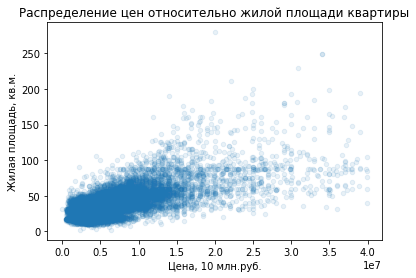

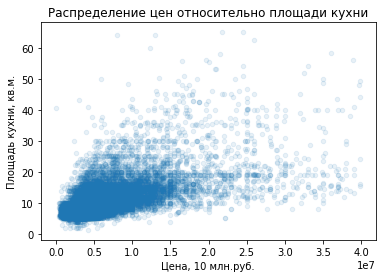

In [58]:
ax = fg.plot(x='last_price', y='living_area', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно жилой площади квартиры")
ax.set_ylabel("Жилая площадь, кв.м.")
ax.set_xlabel("Цена, 10 млн.руб.");
plt.show()
ax = fg_kitchen.plot(x='last_price', y='kitchen_area', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно площади кухни")
ax.set_ylabel("Площадь кухни, кв.м.")
ax.set_xlabel("Цена, 10 млн.руб.");

In [59]:
fg['last_price'].corr(fg['living_area'])

0.699600127923346

In [60]:
fg_kitchen['last_price'].corr(fg_kitchen['kitchen_area'])

0.6093652676066156

Также очевидна сильная взаимосвязь. Но при этом жилая площадь и площадь кухни напрямую зависят от общей площади.
Проанализируем влияние на цену относительных параметров

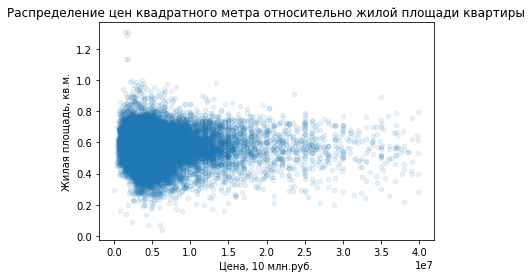

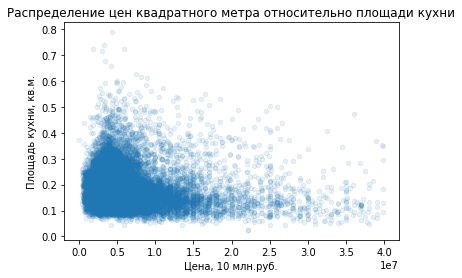

In [61]:
ax = fg.plot(x='last_price', y='living_total', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен квадратного метра относительно жилой площади квартиры")
ax.set_ylabel("Жилая площадь, кв.м.")
ax.set_xlabel("Цена, 10 млн.руб.");
plt.show()
ax = fg_kitchen.plot(x='last_price', y='kitchen_total', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен квадратного метра относительно площади кухни")
ax.set_ylabel("Площадь кухни, кв.м.")
ax.set_xlabel("Цена, 10 млн.руб.");

In [62]:
fg['last_price'].corr(fg['living_total'])

0.010824079275598943

In [63]:
fg_kitchen['last_price'].corr(fg_kitchen['kitchen_total'])

-0.1404152199393154

Как видно из графиков, на цене отражается в первую очередь общая площадь квартиры, а размер жилой площади и площади кухни просто должны соответствовать когда то найденным параметрам и напрямую не влияют на цену.

При этом я знаю от близких, как важна большая кухня, как некомфортно было в маленьких старых кухнях, построенных в советское время. Возможно эта корреляция проявляется лишь для небольших квартир  
Проверим гипотезу

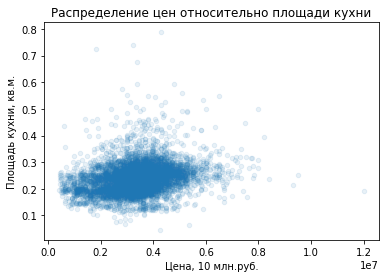

In [64]:
smal = fg_kitchen.query('total_area < 42').reset_index(drop=True)
ax = smal.plot(x='last_price', y='kitchen_total', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно площади кухни")
ax.set_ylabel("Площадь кухни, кв.м.")
ax.set_xlabel("Цена, 10 млн.руб.");


In [65]:
smal['last_price'].corr(smal['kitchen_total'])

0.2553291890785646

На самом деле, для небольших квартир размер кухни имеет большее значение   


Проверим зависимость цены от числа комнат

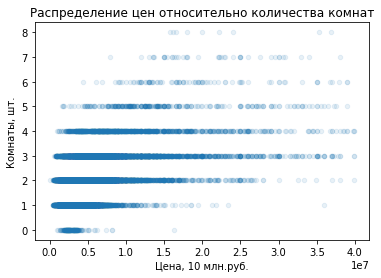

In [66]:
ax = fg.plot(x='last_price', y='rooms', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно количества комнат")
ax.set_ylabel("Комнаты, шт.")
ax.set_xlabel("Цена, 10 млн.руб.");

In [67]:
fg['last_price'].corr(fg['rooms'])


0.5187645221561833

Цена активно растет до 3 комнат, дальше наоброт. Вероятно спрос ниже

Можно предположить, что цена растет вместе с площадью, ведь трехкомнатные квартиры в среднем больше однокомнатных:
Проверим влияние количества комнат на цены  при одинаковой площади.

In [68]:
df.pivot_table(index='total_cut',columns= 'rooms',values='last_price',aggfunc = 'mean' ).reset_index()

rooms,total_cut,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
0,"(11.999, 31.0]",2.742384e+06,2.778266e+06,2.021111e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(31.0, 33.0]",3.683333e+06,3.068256e+06,3.348750e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(33.0, 35.2]",3.206250e+06,3.416033e+06,2.758547e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(35.2, 37.6]",NaN,3.506935e+06,2.622000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(37.6, 40.0]",3.890000e+06,4.006935e+06,2.842553e+06,NaN,NaN,1.750000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"(40.0, 42.0]",NaN,4.151538e+06,3.216118e+06,3.581794e+06,2.350000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(42.0, 44.0]",4.656333e+06,4.470573e+06,3.352834e+06,3.763333e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"(44.0, 46.0]",5.050000e+06,4.936326e+06,3.710700e+06,3.076667e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(46.0, 49.0]",NaN,5.104442e+06,4.071838e+06,2.856364e+06,3.930360e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"(49.0, 52.0]",NaN,5.766872e+06,4.611701e+06,4.070317e+06,3.788379e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.pivot_table(index='total_cut',columns= 'rooms',values='price',aggfunc = 'mean' ).reset_index()

rooms,total_cut,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
0,"(11.999, 31.0]",107574.345635,96584.225407,77690.111760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(31.0, 33.0]",114301.594066,95329.192575,103698.837332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(33.0, 35.2]",92846.944010,99629.980746,80186.748975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(35.2, 37.6]",NaN,96363.660993,71795.283112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(37.6, 40.0]",101566.579634,102883.853850,72600.927619,NaN,NaN,43750.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"(40.0, 42.0]",NaN,100643.450077,77307.654641,86012.416699,55952.380952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"(42.0, 44.0]",108996.551136,103695.876727,77235.727018,87776.720241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"(44.0, 46.0]",114253.393665,109255.501162,82087.016295,67636.976309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"(46.0, 49.0]",NaN,107539.358224,85611.405182,59454.162700,80602.328821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"(49.0, 52.0]",NaN,113943.334256,90816.782818,80035.470846,76269.498765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Из обеих таблиц явно видно, что однокомнатные квартиры стоят дороже при одинаковой площади, ситуация меняется в квартирах больше 93 метров, где люди явно предпочитаю делить полезную площадь на большее количество комнат.
Очевидно, что средняя цена 2 х и 3 х комнатных квартир выше исключительно из за того, что эти квартиры в среднем большей площади.

Также интересно, что цена, и видимо предпочтения покупателей, 2 х комнатных квартир выше цены 3 х комнатных квартир. Можно пойти дальше нашего исследования, и сделать вывод, что несмотря на то, что строится больше 1 и 2 комнантых квартир, застройщики еще не в полной мере успевают за изменениями предпочтений клиентов и демографической ситуации.

Проверим зависимость цены от этажа (первого или последнего)

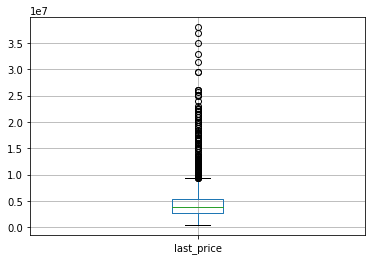

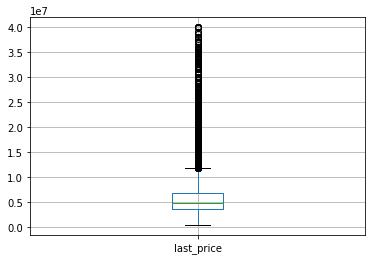

<AxesSubplot:>

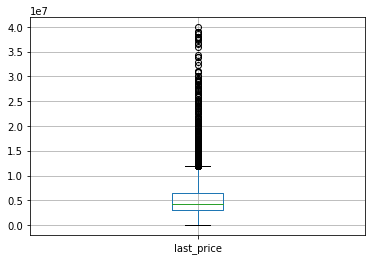

In [70]:
fg[fg['floor1last'] == 'first'].boxplot(column='last_price')
plt.show()
fg[fg['floor1last'] == 'another'].boxplot(column='last_price')
plt.show()
fg[fg['floor1last'] == 'last'].boxplot(column='last_price')

Как видно из графиков первые этажи явно не ценятся среди покупателей жилой недвижимости, цены заметно ниже.   
Цены квартир на последнем этаже также в среднем ниже, чем на прочих этажах, но распределение уже отличается не так сильно.   

Проверим зависимость цены от удалённости от центра:

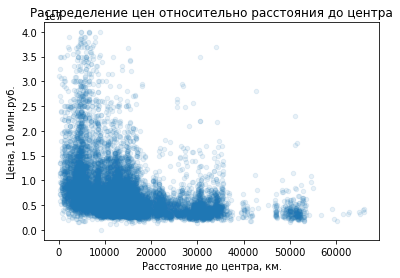

In [71]:
ax = fg.plot(x='citycenters_nearest', y='last_price', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно расстояния до центра")
ax.set_xlabel("Расстояние до центра, км.")
ax.set_ylabel("Цена, 10 млн.руб.");

In [72]:
fg['last_price'].corr(fg['citycenters_nearest'])

-0.3362281135773869

Чем ближе  к центру города, тем выше цены, обошлось без открытий.  
Корреляция явная и существенная.



Изучим зависимость от даты размещения: дня недели, месяца и года. 
 

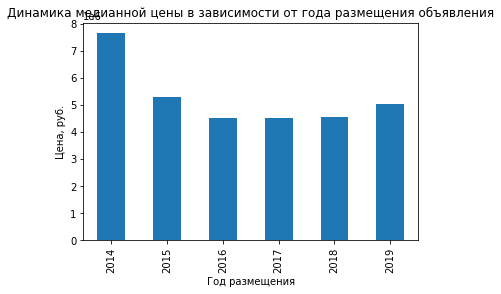

In [73]:
ax = df.groupby('year_exp')['last_price'].median().plot(kind='bar')
ax.set_title("Динамика медианной цены в зависимости от года размещения объявления")
ax.set_xlabel("Год размещения")
ax.set_ylabel("Цена, руб.");

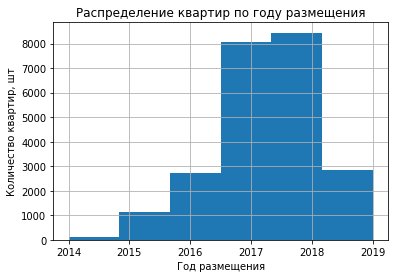

In [74]:
ax = fg['year_exp'].hist(bins = 6)
ax.set_title("Распределение квартир по году размещения")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Год размещения");

In [75]:
df['first_day_exposition'].sort_values()

6726    2014-11-27
20635   2014-11-27
617     2014-11-27
2831    2014-11-27
15857   2014-11-27
           ...    
12380   2019-05-03
8170    2019-05-03
10917   2019-05-03
21887   2019-05-03
14246   2019-05-03
Name: first_day_exposition, Length: 23565, dtype: datetime64[ns]

Видно сильное падение цен после 14 года и начало восстановления лишь в 2018 г.

Объем данных в 2014 году ограничивается 1 им месяцем, дальше растет. При этом нашему выводу можно доверять, так как он согласуется с данными аналитического центра irn.ru и других участников рынка.

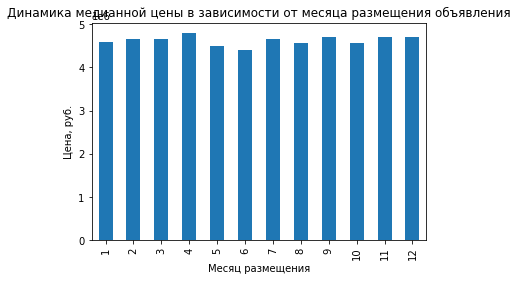

In [76]:
ax = df.groupby('month_exp')['last_price'].median().plot(kind='bar')
ax.set_title("Динамика медианной цены в зависимости от месяца размещения объявления")
ax.set_xlabel("Месяц размещения")
ax.set_ylabel("Цена, руб.");

Можно заметить несущественное снижние медианной цены в мае и июне, сложно сделать из этого выводы, в целом видно, что месяц не влияет существенно на цену размещения

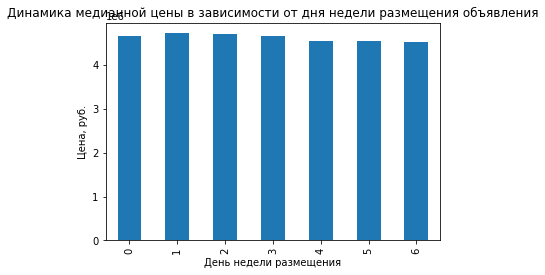

In [77]:
ax = df.groupby('weekday_exp')['last_price'].median().plot(kind='bar')
ax.set_title("Динамика медианной цены в зависимости от дня недели размещения объявления")
ax.set_xlabel("День недели размещения")
ax.set_ylabel("Цена, руб.");

День недели не влияет на цену размещения.  


Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах:

In [78]:
locality_10 = fg.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index.tolist()
locality = fg.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
locality

locality_name
санкт-петербург      15432
посёлок мурино         520
посёлок шушары         439
всеволожск             397
пушкин                 368
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [79]:
(
fg.query('locality_name in @locality_10')
    .groupby('locality_name')['price']
    .agg(['count','median'])
    .sort_values(by = 'median', ascending=False)
)

,count,median
locality_name,,
санкт-петербург,15432,104411.764706
пушкин,368,99993.589744
деревня кудрово,299,91860.465116
посёлок парголово,327,91642.857143
посёлок мурино,520,85878.462169
посёлок шушары,439,76829.268293
колпино,338,74723.748474
гатчина,307,67796.610169
всеволожск,397,65789.473684


Среди 10 населенных пунктов с наибольшим количеством объявлений самое дорогое жилье в Санкт-Петербурге, самое дешевое в Выборге.

In [80]:
spb = fg.query('locality_name == "санкт-петербург"').copy()
spb['centre_km'] = spb['citycenters_nearest']/1000
spb['centre_km'] = spb['centre_km'].round()
grafik = spb.groupby('centre_km')['price'].median()
grafik

centre_km
0.0     137755.102041
1.0     123529.411765
2.0     117186.218212
3.0     108097.545220
4.0     117303.332188
5.0     125797.875952
6.0     124678.590845
7.0     123509.418348
8.0     122564.832385
9.0     105813.953488
10.0    106707.317073
11.0    103276.524490
12.0    103988.603989
13.0    104000.000000
14.0    101857.602945
15.0    101300.981554
16.0     97500.000000
17.0     94651.525659
18.0     95000.000000
19.0     97117.957415
20.0    103703.693333
21.0     89705.882353
22.0     88781.474414
23.0     89965.397924
24.0     86353.290416
25.0     93612.162162
26.0     87368.421053
27.0    132115.709459
28.0     79372.093023
29.0     76084.734212
Name: price, dtype: float64

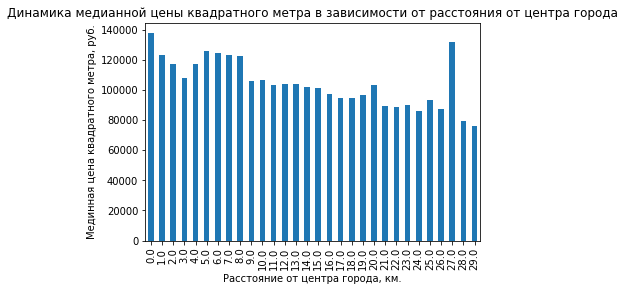

In [81]:
ax = grafik.plot(x='centre_km', y='price', kind='bar')
ax.set_title("Динамика медианной цены квадратного метра в зависимости от расстояния от центра города")
ax.set_xlabel("Расстояние от центра города, км.")
ax.set_ylabel("Мединная цена квадратного метра, руб.");

Мы построили график отражающий изменение средней цены квадратного метра в зависимости от удаленности от центра города.  
Логично видеть пик в диаметре один километр со средней 138 000 руб./кв.м.   Мне не ясна природа снижения цены в радиусе 3 км.до 108 000 руб./кв.м., при этом дальше цена поднимается держится около 123 000 руб./кв.м. до 8,5 км от центра.   На графике видно, что после идет резкое снижение  
Будем считать центром квартиры расположенные не дельше 8,5 км от центра.  

Выделим сегмент квартир в центре для анализа:

In [82]:
city_centre = spb.query('centre_km < 9')
city_centre.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_cut,ponds_around3000,price,floor1last,living_total,kitchen_total,year_exp,month_exp,weekday_exp,centre_km
3,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,"(93.52, 116.0]",1.0,100000.000000,another,0.320000,0.410000,2018,6,1,8.0
23,8,6500000.0,97.2,2015-10-31,2,NaN,3.0,46.5,1,True,...,"(93.52, 116.0]",3.0,66872.427984,first,0.478395,0.201646,2015,10,5,2.0
34,6,15500000.0,149.0,2017-06-26,5,NaN,5.0,104.0,4,True,...,"(116.0, 900.0]",1.0,104026.845638,another,0.697987,0.114094,2017,6,0,4.0
50,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.0,2,True,...,"(116.0, 900.0]",0.0,86727.941176,last,0.691176,0.080882,2017,9,4,7.0
59,18,7990000.0,74.0,2017-08-24,2,NaN,4.0,43.0,4,True,...,"(69.9, 75.0]",0.0,107972.972973,last,0.581081,0.270270,2017,8,3,4.0


Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

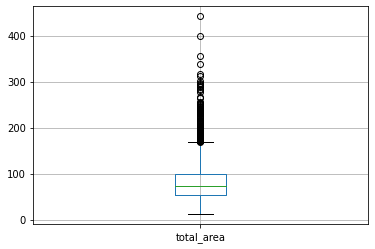

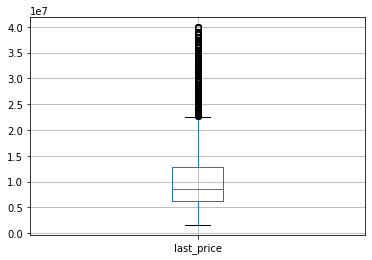

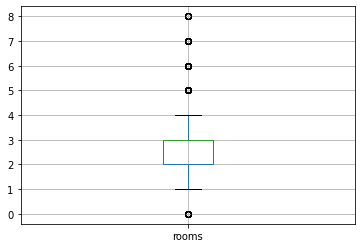

<AxesSubplot:>

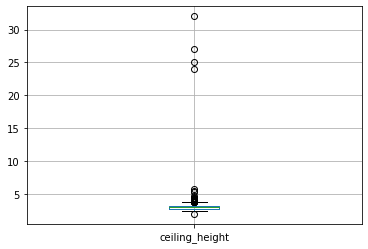

In [83]:
city_centre.boxplot(column='total_area')
plt.show()
city_centre.boxplot(column='last_price')
plt.show()
city_centre.boxplot(column='rooms')
plt.show()
city_centre.boxplot(column='ceiling_height')

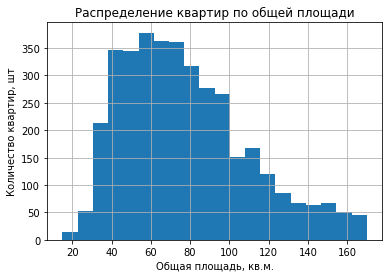

In [84]:
ax = city_centre['total_area'].hist(bins = 20, range = (15, 170))
ax.set_title("Распределение квартир по общей площади")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Общая площадь, кв.м.");


В центре квартры площадью в основном от 30 до 100 метров с пиком в 45 метров

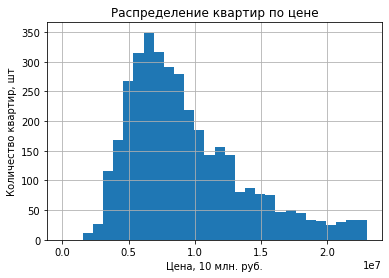

In [85]:
ax = city_centre['last_price'].hist(bins = 30, range = (0, 23000000))

ax.set_title("Распределение квартир по цене")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Цена, 10 млн. руб.");


Цены в основном от 4 млн. руб. до 10 млн. руб. с пиком в 6 млн.

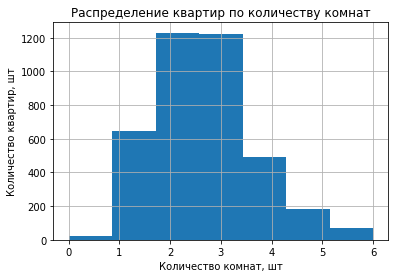

In [86]:
ax = city_centre['rooms'].hist(bins = 7, range = (0, 6))
ax.set_title("Распределение квартир по количеству комнат")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Количество комнат, шт");


В основном 2 х и 3 х комнатные квартиры, однокомнатных в 2 раза меньше. На удивление большое количество 4 х комнатных квартир.

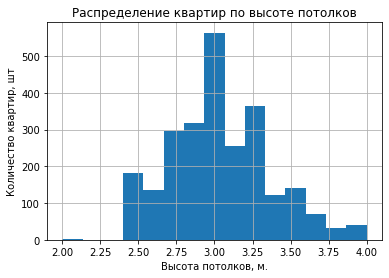

In [87]:
ax = city_centre['ceiling_height'].hist(bins = 15, range = (2, 4))

ax.set_title("Распределение квартир по высоте потолков")
ax.set_ylabel("Количество квартир, шт")
ax.set_xlabel("Высота потолков, м.");

Высота потолков квартир в центре в основном от 2,75 м. до 3,25 м. очень большое количество квартир с 3 метровыми потолками



Выделим факторы, которые влияют на стоимость квартиры в центре:

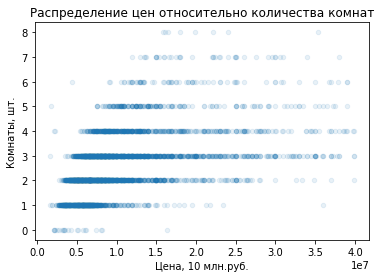

In [88]:
ax = city_centre.plot(x='last_price', y='rooms', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно количества комнат")
ax.set_ylabel("Комнаты, шт.")
ax.set_xlabel("Цена, 10 млн.руб.");

In [89]:
city_centre['last_price'].corr(fg['rooms'])

0.49244882455516664

In [90]:
city_centre.pivot_table(index='total_cut',columns= 'rooms',values='price',aggfunc = 'mean' ).reset_index()

rooms,total_cut,0,1,2,3,4,5,6,7,8
0,"(11.999, 31.0]",137523.617519,138401.428903,139583.333333,NaN,NaN,NaN,NaN,NaN,NaN
1,"(31.0, 33.0]",158074.578922,128324.541744,125999.579125,NaN,NaN,NaN,NaN,NaN,NaN
2,"(33.0, 35.2]",NaN,139822.335549,132482.533243,NaN,NaN,NaN,NaN,NaN,NaN
3,"(35.2, 37.6]",NaN,140598.021659,139088.397790,NaN,NaN,NaN,NaN,NaN,NaN
4,"(37.6, 40.0]",NaN,146826.270103,107022.208330,NaN,NaN,NaN,NaN,NaN,NaN
5,"(40.0, 42.0]",NaN,148239.917856,120548.433773,NaN,NaN,NaN,NaN,NaN,NaN
6,"(42.0, 44.0]",137875.288684,142576.861176,115490.024149,116279.069767,NaN,NaN,NaN,NaN,NaN
7,"(44.0, 46.0]",114253.393665,153625.074280,111143.085274,126637.554585,NaN,NaN,NaN,NaN,NaN
8,"(46.0, 49.0]",NaN,139932.175623,115505.520506,108163.265306,NaN,NaN,NaN,NaN,NaN
9,"(49.0, 52.0]",NaN,149305.475814,130324.557797,120537.941412,NaN,NaN,NaN,NaN,NaN


Цена растет вместе с количеством комнат, и опять это связано с увеличением площади. При одинаковой площади однокомнатные квартиры дороже в среднем

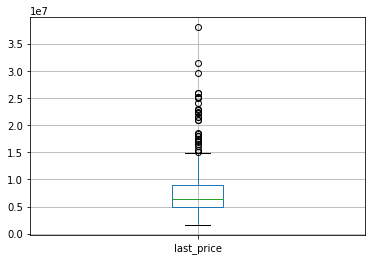

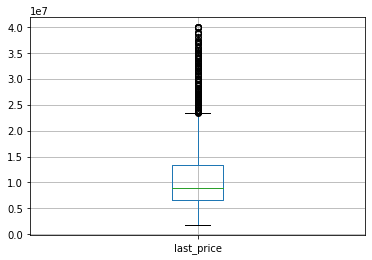

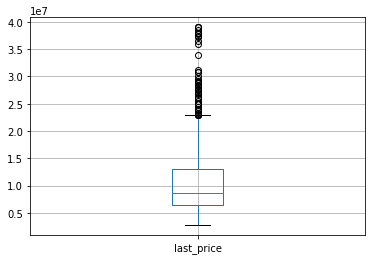

In [91]:
city_centre[city_centre['floor1last'] == 'first'].boxplot(column='last_price')
plt.show()
city_centre[city_centre['floor1last'] == 'another'].boxplot(column='last_price')
plt.show()
city_centre[city_centre['floor1last'] == 'last'].boxplot(column='last_price');

Квартиры на первых этажах существенно дешевле остальных, квартиры на последних этажах продат без скидки

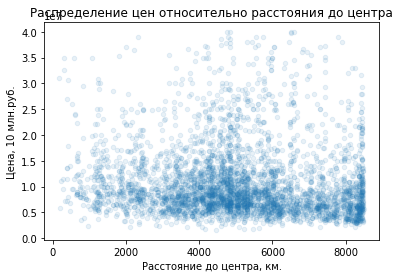

In [92]:
ax = city_centre.plot(x='citycenters_nearest', y='last_price', kind='scatter', alpha = 0.1)
ax.set_title("Распределение цен относительно расстояния до центра")
ax.set_xlabel("Расстояние до центра, км.")
ax.set_ylabel("Цена, 10 млн.руб.");

In [93]:
city_centre['last_price'].corr(city_centre['citycenters_nearest'])

-0.09509651214386458

В этой части города уже нет явной зависимости цены квартиры от расстояния до условного цетра

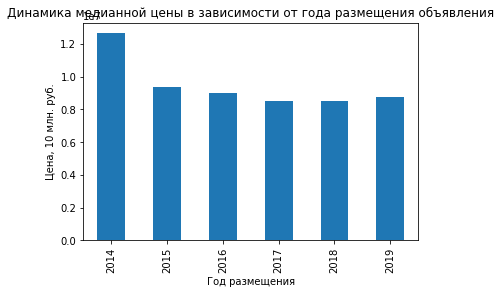

In [94]:
ax = city_centre.groupby('year_exp')['last_price'].median().plot(kind='bar')

ax.set_title("Динамика медианной цены в зависимости от года размещения объявления")
ax.set_xlabel("Год размещения")
ax.set_ylabel("Цена, 10 млн. руб.");

С 2014 года цены упали и стагнируют, в 2019 ом наметилась слабая тенденция к росту

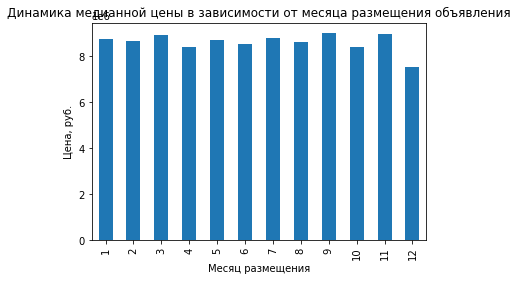

In [95]:
ax = city_centre.groupby('month_exp')['last_price'].median().plot(kind='bar')
ax.set_title("Динамика медианной цены в зависимости от месяца размещения объявления")
ax.set_xlabel("Месяц размещения")
ax.set_ylabel("Цена, руб.");

Цена объектов выставленных в декабре в среднем ниже

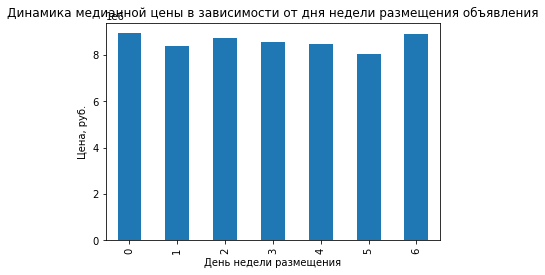

In [96]:
ax = city_centre.groupby('weekday_exp')['last_price'].median().plot(kind='bar')

ax.set_title("Динамика медианной цены в зависимости от дня недели размещения объявления")
ax.set_xlabel("День недели размещения")
ax.set_ylabel("Цена, руб.");


Сложно увидеть взаимосвязь цены и дня недели, различия похожи на случайные

В целом видно, что на цены квартир в центре города влияют те же факторы, что и на остальные. Есть пара собенностей:
квартиры на последних этажах не теряют в цене в среднем, цена уже не так зависит от расположения относительно условного центра.

## Общий вывод

Для анализа рынка недивижимости Санкт-Петербурга мы получили выгрузку из сервиса Яндекс.Недвижимость в 23 699 строк и 22 колонками.  

Отсутствующую в 49% строк информацию о балконах заполнили нулями.     
Также мы сгрупировали квартиры по общей площади и заполнили медианными значения по каждой группе отстуттвующие данные общей площади и площади кухни, т.е. около 10% строк. Другие пропущенные данные не стали заполнять, т.к. нет надежного способа. 

На следующем этапе мы добавили в таблицу:
- цену квадратного метра,
- день недели, месяц и год публикации объявления,
- варианты — первый, последний, другой этаж квартиры,
- соотношение жилой и общей площади,
- отношение площади кухни к общей.  
 
Изучили следующие параметры: площадь, цена, число комнат, высота потолков:  
 - больше всего квартир размером от 30 до 82 кв.м. с явным пиком 42-44 кв.м.  
 - цена квартир в среднем от 2,5 до 9 млн. руб. Большая часть квартир продается по цене от 3 до 5,5 млн. руб.  
 - наиболее популярны 1 и 2 комнатные квартиры, потом идут 3 комнатные, квартиры с большим количсетвом комнат продаются существенно реже  
 - высота потолков в большинстве квартир 2,5 метра, потолки выше 3 х метров редки  
 
Изучили время продажи квартиры:   
В среднем квартиры продаются за 45 - 60 дней, если сделка совершена за срок меньше 30 дней, можно сказать,что продажа прошла быстро, больше 180 дней - необычайно долго.  

Изучили факторы влияющие на стоимость квартиры:  
- зависимость цены квартры  от площади прямая и очень существенная  
- однокомнатные квартиры стоят дороже при одинаковой площади, ситуация меняется в квартирах больше 93 метров, где люди явно предпочитаю делить полезную площадь на большее количество комнат. Видно, что средняя цена 2 х и 3 х комнатных квартир выше исключительно из за того, что эти квартиры в среднем большей площади  
- первые этажи явно не ценятся среди покупателей жилой недвижимости, цены заметно ниже, дороже стоят квартиры на последнем этаже, еще дороже все остальные  
- чем ближе  квартра к центру города, тем выше цены.   
- год размещения существенно влияет на цену, хорошо видна динамика: резкое снижение после 2014 г. и начало восстановления в 2018 г. . Месяц и день недели не оказывают явного влияния на цену.  

Среди 10 населенных пунктов с наибольшим количеством объявлений самое дорогое жилье в Санкт-Петербурге, самое дешевое в Выборге  
Мы выделили квартиры в центре Санкт-Петербурга в радуисе 8,5 км. заметив, что после резко снижается цена квартир.  
Увидели, что на цены квартир в центре города влияют те же факторы, что и на остальные. Есть пара собенностей: квартиры на последних этажах не теряют в цене в среднем, цена уже не так зависит от расположения относительно условного центра.